In [1]:
#pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# nltk.download() # ei tarvita luultavasti, jos ei toimi, voi kokeilla myös: nltk.download("stopwords")

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize



In [2]:
text = open('speeches/2013-Obama.txt', encoding='latin-1').read() 
# text = open('speeches/2017-Trump.txt', encoding='latin-1').read() 

In [3]:
# strip extra characters
for c in ['.',',',':',';', '"', '?',"'s"]:
    text = text.replace(c,'')
print(text)

Thank you Thank you so much

Vice President Biden Mr Chief Justice Members of the United States Congress distinguished guests and fellow citizens

Each time we gather to inaugurate a President we bear witness to the enduring strength of our Constitution We affirm the promise of our democracy We recall that what binds this Nation together is not the colors of our skin or the tenets of our faith or the origins of our names What makes us exceptionalwhat makes us Americanis our allegiance to an idea articulated in a declaration made more than two centuries ago

We hold these truths to be self-evident that all men are created equal that they are endowed by their Creator with certain unalienable rights that among these are life liberty and the pursuit of happiness

Today we continue a never-ending journey to bridge the meaning of those words with the realities of our time For history tells us that while these truths may be self-evident they've never been self-executing that while freedom i

In [4]:
tokens2 = nltk.word_tokenize(text.lower())
tokens = nltk.word_tokenize(text)
tokens

['Thank',
 'you',
 'Thank',
 'you',
 'so',
 'much',
 'Vice',
 'President',
 'Biden',
 'Mr',
 'Chief',
 'Justice',
 'Members',
 'of',
 'the',
 'United',
 'States',
 'Congress',
 'distinguished',
 'guests',
 'and',
 'fellow',
 'citizens',
 'Each',
 'time',
 'we',
 'gather',
 'to',
 'inaugurate',
 'a',
 'President',
 'we',
 'bear',
 'witness',
 'to',
 'the',
 'enduring',
 'strength',
 'of',
 'our',
 'Constitution',
 'We',
 'affirm',
 'the',
 'promise',
 'of',
 'our',
 'democracy',
 'We',
 'recall',
 'that',
 'what',
 'binds',
 'this',
 'Nation',
 'together',
 'is',
 'not',
 'the',
 'colors',
 'of',
 'our',
 'skin',
 'or',
 'the',
 'tenets',
 'of',
 'our',
 'faith',
 'or',
 'the',
 'origins',
 'of',
 'our',
 'names',
 'What',
 'makes',
 'us',
 'exceptional\x97what',
 'makes',
 'us',
 'American\x97is',
 'our',
 'allegiance',
 'to',
 'an',
 'idea',
 'articulated',
 'in',
 'a',
 'declaration',
 'made',
 'more',
 'than',
 'two',
 'centuries',
 'ago',
 'We',
 'hold',
 'these',
 'truths',
 'to',

In [5]:
# stop_words = stopwords.words('english')
filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
filtered_tokens2 = [token for token in tokens2 if token not in stopwords.words('english')]

In [6]:
freq = nltk.FreqDist(filtered_tokens) 
for key,val in freq.most_common(15): 
    print ("%30s %5d" % (str(key), val))  


                            We    23
                            us    21
                          must    17
                        people    11
                          time     9
                       America     8
                           Our     7
                       country     7
                          make     7
                         every     7
                      citizens     6
                       journey     6
                           For     6
                       freedom     6
                    generation     6


In [7]:
freq2 = nltk.FreqDist(filtered_tokens2) 
for key,val in freq2.most_common(15): 
    print ("%30s %5d" % (str(key), val))  

                            us    21
                          must    17
                        people    11
                          time     9
                       america     8
                      together     7
                       country     7
                          make     7
                         every     7
                      citizens     6
                        nation     6
                         today     6
                       journey     6
                       freedom     6
                    generation     6


In [21]:
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

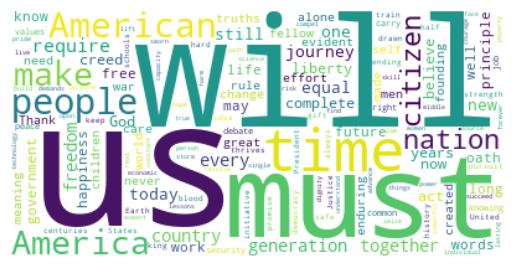

In [22]:
import matplotlib.pyplot as plt

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

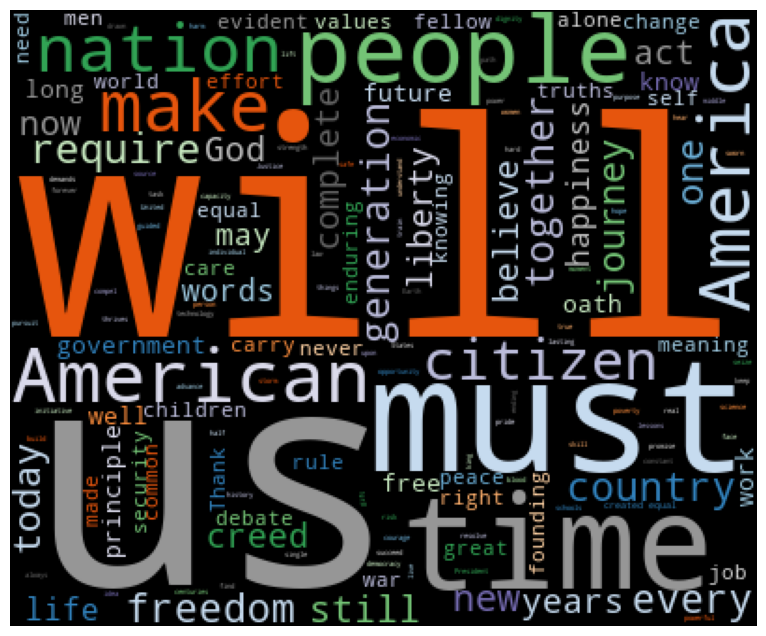

In [23]:
wordcloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='tab20c',
                      collocations=True).generate_from_text(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
#plt.title(fdsds, fontsize=13)
plt.show()

In [8]:
pos = open("positive-words.txt").read().split()
print(pos)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [9]:
neg = open("negative-words.txt").read().split()
print(neg)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [10]:
countpositive = countnegative = countneutral = counttotal = 0

for token in filtered_tokens2:
    counttotal += 1
    cat = ""
    if token in pos:
        cat = cat + "POS"
        countpositive += 1
    if token in neg:
        cat = cat + "NEG"
        countnegative += 1
    else:
        countneutral +=1
 
    # print("Word:", token, cat)
print("Positiivinen kpl:" , countpositive)
print("Negatiivinen kpl:", countnegative)
print("Neturaali kpl:", countneutral)

Positiivinen kpl: 101
Negatiivinen kpl: 48
Neturaali kpl: 980


In [11]:
sentiment = (countpositive - countnegative) / counttotal
print("Obama sentiment:", sentiment)

Obama sentiment: 0.05155642023346303


In [12]:
import math
print("Positive=%.2f Negative =%.2f Neutral=%.2f" % (countpositive/counttotal, countnegative/counttotal, countneutral/counttotal))
print("Positiveness =%.2f Affection=%2.f" % (math.log(countpositive/countnegative), 1-countneutral/counttotal))

Positive=0.10 Negative =0.05 Neutral=0.95
Positiveness =0.74 Affection= 0
